## Identify any missing data. 

## Mark the missing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *
# Useful for matplotlib in JN's
%matplotlib inline

In [2]:
# USeful for matplotlib in JN's
%matplotlib inline
fileName = r'C:\Users\smaxw\Downloads\pima-indians-diabetes.csv'
namesCol = [
'preg',
'plas',
'pres',
'skin',
'test',
'mass',
'pedi',
'age',
'class'
]

data = pd.read_csv(fileName, names=namesCol)
print(data.head(20))

    preg  plas  pres  skin  test  mass   pedi  age  class
0      6   148    72    35     0  33.6  0.627   50      1
1      1    85    66    29     0  26.6  0.351   31      0
2      8   183    64     0     0  23.3  0.672   32      1
3      1    89    66    23    94  28.1  0.167   21      0
4      0   137    40    35   168  43.1  2.288   33      1
5      5   116    74     0     0  25.6  0.201   30      0
6      3    78    50    32    88  31.0  0.248   26      1
7     10   115     0     0     0  35.3  0.134   29      0
8      2   197    70    45   543  30.5  0.158   53      1
9      8   125    96     0     0   0.0  0.232   54      1
10     4   110    92     0     0  37.6  0.191   30      0
11    10   168    74     0     0  38.0  0.537   34      1
12    10   139    80     0     0  27.1  1.441   57      0
13     1   189    60    23   846  30.1  0.398   59      1
14     5   166    72    19   175  25.8  0.587   51      1
15     7   100     0     0     0  30.0  0.484   32      1
16     0   118

In [3]:
print(data.describe())
print(data.dtypes)

             preg        plas        pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [20]:
print((data == 0).sum())
print()
print((data < 0).sum())
print()
print(data.std())
print()
print(data.mean())
print()
print((data['age'] == 0).sum())
print()
print((data['age'] < 0).sum())
print()
print(data['age'].mean())

preg     111
plas       5
pres      35
skin       0
test     374
mass       0
pedi       0
age        0
class    500
dtype: int64

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

preg       3.369578
plas      31.972618
pres      19.355807
skin      10.476982
test     115.244002
mass       6.924988
pedi       0.331329
age       11.760232
class      0.476951
dtype: float64

preg       3.845052
plas     120.894531
pres      69.105469
skin      29.153420
test      79.799479
mass      32.457464
pedi       0.471876
age       33.240885
class      0.348958
dtype: float64

0

0

33.240885416666664


Attribue: PREG
Summary:
N outside of two STD:	 34 	( 4.43 %)
N outside of three STD:	 4 	( 0.52 %)


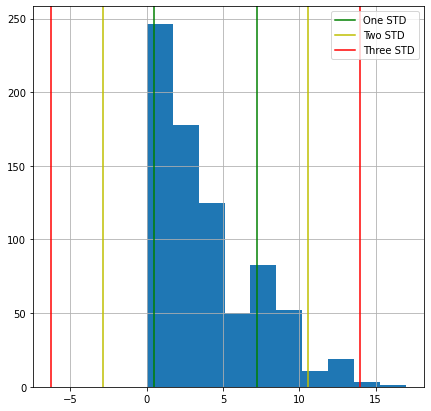

Attribue: PLAS
Summary:
N outside of two STD:	 36 	( 4.69 %)
N outside of three STD:	 5 	( 0.65 %)


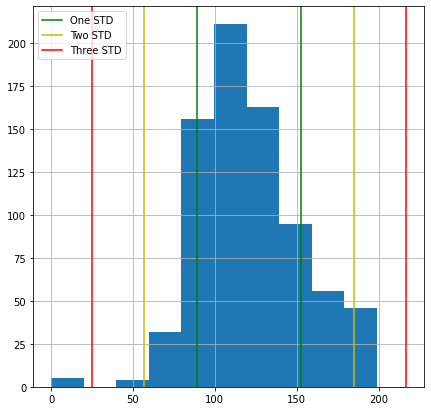

Attribue: PRES
Summary:
N outside of two STD:	 45 	( 5.86 %)
N outside of three STD:	 35 	( 4.56 %)


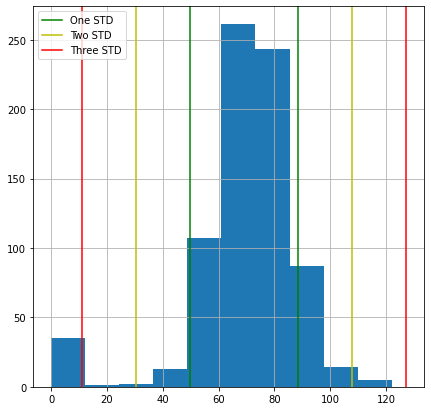

Attribue: SKIN
Summary:
N outside of two STD:	 6 	( 0.78 %)
N outside of three STD:	 1 	( 0.13 %)


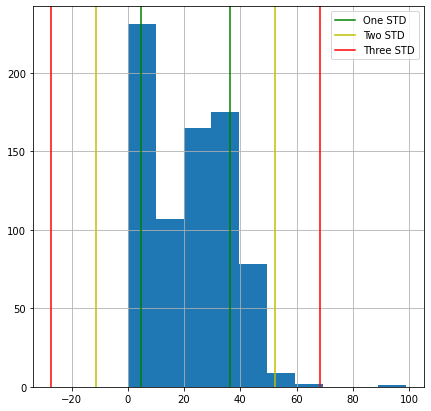

Attribue: TEST
Summary:
N outside of two STD:	 35 	( 4.56 %)
N outside of three STD:	 18 	( 2.34 %)


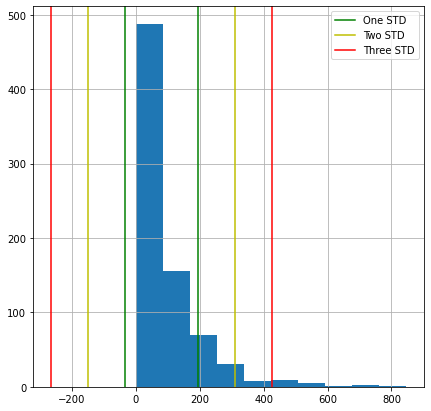

Attribue: MASS
Summary:
N outside of two STD:	 27 	( 3.52 %)
N outside of three STD:	 14 	( 1.82 %)


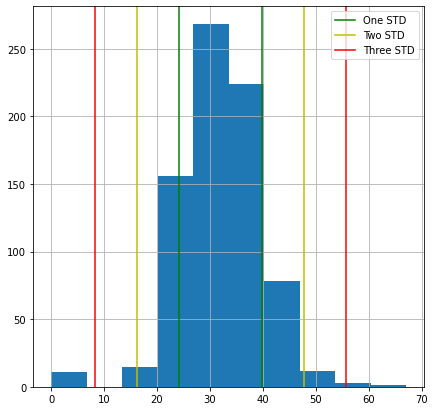

Attribue: PEDI
Summary:
N outside of two STD:	 39 	( 5.08 %)
N outside of three STD:	 11 	( 1.43 %)


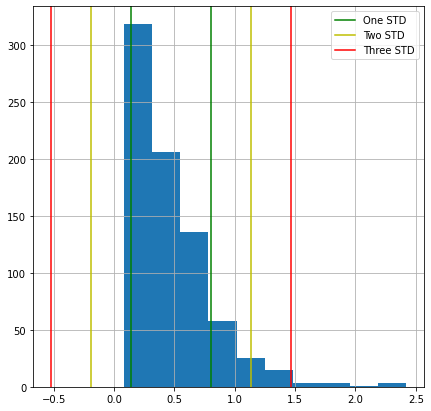

Attribue: AGE
Summary:
N outside of two STD:	 47 	( 6.12 %)
N outside of three STD:	 5 	( 0.65 %)


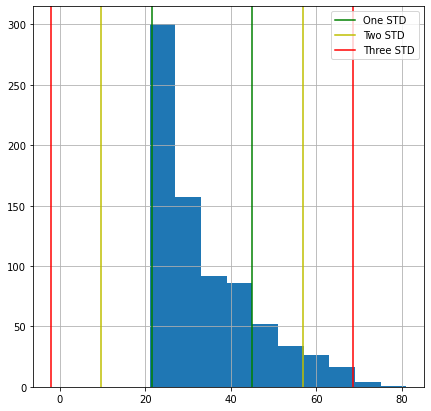

Attribue: CLASS
Summary:
N outside of two STD:	 0 	( 0.0 %)
N outside of three STD:	 0 	( 0.0 %)


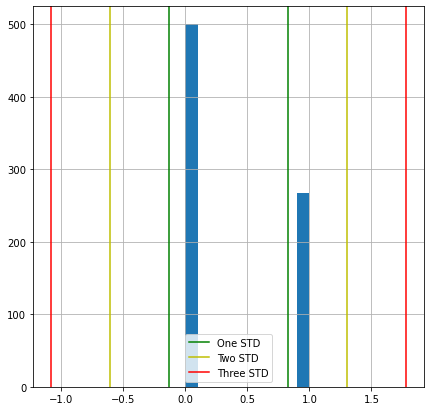

In [5]:
def plotAttribute(featureName):
    oneSTD = data[featureName].std()
    twoSTD = oneSTD * 2
    threeSTD = oneSTD * 3
    meanValue = data[featureName].mean()

    print("Attribue:", featureName.upper())
    print("Summary:")
    instances = data.shape[0]
    outsideTwo = ((data[featureName] < (meanValue - twoSTD)).sum() + (data[featureName] > (meanValue + twoSTD)).sum())
    outsideThree = ((data[featureName] < (meanValue - threeSTD)).sum() + (data[featureName] > (meanValue + threeSTD)).sum())

    print("N outside of two STD:\t", outsideTwo, "\t(", round((outsideTwo/instances) *100, 2),"%)")
    print("N outside of three STD:\t", outsideThree, "\t(", round((outsideThree/instances) * 100, 2),"%)")

    plt.axvline(x=(meanValue - oneSTD), label='One STD', c="g")
    plt.axvline(x=(meanValue + oneSTD), c="g")
    
    plt.axvline(x=(meanValue - twoSTD), label='Two STD', c="y")
    plt.axvline(x=(meanValue + twoSTD), c="y")
    plt.axvline(x=(meanValue - threeSTD), label='Three STD', c="r")
    plt.axvline(x=(meanValue + threeSTD), c="r")
    data[featureName].hist(figsize=(7,7))
    plt.legend()
    plt.show()
    
for attribute in namesCol:
    plotAttribute(attribute)

## Choose to either remove or impute dataIdentify and discuss any outliers (you do not have to address, just identify)

In [19]:
data = pd.read_csv(fileName, names=namesCol)
data = data.mask(data == 0, np.NaN)
print(data.head(20))
print()

data = pd.read_csv(fileName, names=namesCol)
data["mass"] = data["mass"].mask(data["mass"] == 0, np.NaN)
print(data.head(20))
print()
print("\n\n Missing data:", data.isnull().sum())
print()

data = pd.read_csv(fileName, names=namesCol)
data[["skin", "mass"]] = data[["skin", "mass"]].mask(data[["skin","mass"]] == 0,np.NaN)
print(data.head(20))

    preg   plas  pres  skin   test  mass   pedi  age  class
0    6.0  148.0  72.0  35.0    NaN  33.6  0.627   50    1.0
1    1.0   85.0  66.0  29.0    NaN  26.6  0.351   31    NaN
2    8.0  183.0  64.0   NaN    NaN  23.3  0.672   32    1.0
3    1.0   89.0  66.0  23.0   94.0  28.1  0.167   21    NaN
4    NaN  137.0  40.0  35.0  168.0  43.1  2.288   33    1.0
5    5.0  116.0  74.0   NaN    NaN  25.6  0.201   30    NaN
6    3.0   78.0  50.0  32.0   88.0  31.0  0.248   26    1.0
7   10.0  115.0   NaN   NaN    NaN  35.3  0.134   29    NaN
8    2.0  197.0  70.0  45.0  543.0  30.5  0.158   53    1.0
9    8.0  125.0  96.0   NaN    NaN   NaN  0.232   54    1.0
10   4.0  110.0  92.0   NaN    NaN  37.6  0.191   30    NaN
11  10.0  168.0  74.0   NaN    NaN  38.0  0.537   34    1.0
12  10.0  139.0  80.0   NaN    NaN  27.1  1.441   57    NaN
13   1.0  189.0  60.0  23.0  846.0  30.1  0.398   59    1.0
14   5.0  166.0  72.0  19.0  175.0  25.8  0.587   51    1.0
15   7.0  100.0   NaN   NaN    NaN  30.0

In [7]:
data[["skin", "mass"]] = data[["skin", "mass"]].mask(data[["skin", "mass"]] == 0, np.NaN)
print(data.head(20))
print("Missing Data:", data.isnull().sum())
print("\n\n")
perSkin = (data["skin"].isnull().sum() / data.shape[0]) * 100
perMass = (data["mass"].isnull().sum() / data.shape[0]) * 100
print("Percentage of Skin missing:", perSkin ,"%")
print("Percentage of Mass missing:", perMass ,"%")
data.to_csv("prima-NaN.csv", na_rep='NaN')

    preg  plas  pres  skin  test  mass   pedi  age  class
0      6   148    72  35.0     0  33.6  0.627   50      1
1      1    85    66  29.0     0  26.6  0.351   31      0
2      8   183    64   NaN     0  23.3  0.672   32      1
3      1    89    66  23.0    94  28.1  0.167   21      0
4      0   137    40  35.0   168  43.1  2.288   33      1
5      5   116    74   NaN     0  25.6  0.201   30      0
6      3    78    50  32.0    88  31.0  0.248   26      1
7     10   115     0   NaN     0  35.3  0.134   29      0
8      2   197    70  45.0   543  30.5  0.158   53      1
9      8   125    96   NaN     0   NaN  0.232   54      1
10     4   110    92   NaN     0  37.6  0.191   30      0
11    10   168    74   NaN     0  38.0  0.537   34      1
12    10   139    80   NaN     0  27.1  1.441   57      0
13     1   189    60  23.0   846  30.1  0.398   59      1
14     5   166    72  19.0   175  25.8  0.587   51      1
15     7   100     0   NaN     0  30.0  0.484   32      1
16     0   118

In [8]:
data = pd.read_csv(fileName, names=namesCol)
print(data.isnull().sum())
data["mass"] = data["mass"].mask(data["mass"] == 0, np.NaN)
print(data.head(20))
print("Missing Data:", data.isnull().sum())
print("\n\n")

print(data.shape)
#drop rows with missing values
data.dropna(inplace=True)
print(data.shape)

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64
    preg  plas  pres  skin  test  mass   pedi  age  class
0      6   148    72    35     0  33.6  0.627   50      1
1      1    85    66    29     0  26.6  0.351   31      0
2      8   183    64     0     0  23.3  0.672   32      1
3      1    89    66    23    94  28.1  0.167   21      0
4      0   137    40    35   168  43.1  2.288   33      1
5      5   116    74     0     0  25.6  0.201   30      0
6      3    78    50    32    88  31.0  0.248   26      1
7     10   115     0     0     0  35.3  0.134   29      0
8      2   197    70    45   543  30.5  0.158   53      1
9      8   125    96     0     0   NaN  0.232   54      1
10     4   110    92     0     0  37.6  0.191   30      0
11    10   168    74     0     0  38.0  0.537   34      1
12    10   139    80     0     0  27.1  1.441   57      0
13     1   189    60    23   846  30.1  0.398   59      1
14     5   166    

In [9]:
print(data.isnull().sum())
data["skin"] = data["skin"].mask(data["skin"] == 0, np.NaN)
print(data.head(20))
print("Missing Data:", data.isnull().sum())
print("\n\n")
print(data.shape)
# fill missing values with mean column values, can add any other value here
data.fillna(data.mean(), inplace=True)
print(data.head(20))
print("Missing Data:", data.isnull().sum())
print("\n\n")
print(data.shape)


preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64
    preg  plas  pres  skin  test  mass   pedi  age  class
0      6   148    72  35.0     0  33.6  0.627   50      1
1      1    85    66  29.0     0  26.6  0.351   31      0
2      8   183    64   NaN     0  23.3  0.672   32      1
3      1    89    66  23.0    94  28.1  0.167   21      0
4      0   137    40  35.0   168  43.1  2.288   33      1
5      5   116    74   NaN     0  25.6  0.201   30      0
6      3    78    50  32.0    88  31.0  0.248   26      1
7     10   115     0   NaN     0  35.3  0.134   29      0
8      2   197    70  45.0   543  30.5  0.158   53      1
10     4   110    92   NaN     0  37.6  0.191   30      0
11    10   168    74   NaN     0  38.0  0.537   34      1
12    10   139    80   NaN     0  27.1  1.441   57      0
13     1   189    60  23.0   846  30.1  0.398   59      1
14     5   166    72  19.0   175  25.8  0.587   51      1
15     7   100    

In [22]:
##Creating the new cleaned version of the Csv on your file system.
data.to_csv(r"C:\Users\smaxw\Downloads\pima_cleaned.csv", header=False)

In [11]:
#print(data.corr())
for col in namesCol[:-1]:
    print(col,"\t", data[col].corr(data["class"]))

preg 	 0.2164719506423019
plas 	 0.4659062526390712
pres 	 0.05258486236656619
skin 	 0.21536426871181405
test 	 0.128887643885505
mass 	 0.3136804821984411
pedi 	 0.17961545284275693
age 	 0.2360291074222656


In [12]:
array = data.values

# get seperated input and classifies, using a deep copy of a list
X = array[:,0:8]
Y = array[:,8]

test = feature_selection.SelectKBest(score_func=feature_selection.f_regression,k=4)
fit = test.fit(X, Y)
print()
# have to manually display as no function to do so available

for index, result in enumerate(fit.scores_):
    print("{0:10}".format(namesCol[index]),"{0:10}".format(round(result,2)))


preg            37.12
plas           209.32
pres             2.09
skin            36.72
test            12.75
mass             82.4
pedi            25.17
age             44.54


In [13]:
array = data.values
# get seperated input and classifies, using a deep copy of a list
X = array[:,0:8]
Y = array[:,8]
test = feature_selection.SelectKBest(score_func=feature_selection.chi2, k=4)
fit = test.fit(X, Y)
print()
# have to manually display as no function to do so available

for index, result in enumerate(fit.scores_):
    print("{0:10}".format(namesCol[index]),"{0:10}".format(round(result,2)))


preg           104.66
plas          1392.55
pres            10.03
skin            94.11
test          2079.97
mass           109.91
pedi              5.6
age            173.16


In [14]:
array = data.values
# get seperated input and classifies, using a deep copy of a list
X = array[:,0:8]
Y = array[:,8]
model = linear_model.LogisticRegression()
rfe = feature_selection.RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("\n{0:<10}".format("Attribute"),"{0:<10}".format("Select?"), "{0:<10}".format("Rank"))
print("--------------------")

for index, result in enumerate(list(fit.ranking_)):
    print("{0:<10}".format(namesCol[index]),"{0:<10}".format(fit.support_[index]),"{0:<10}".format(result))

Num Features: 3

Attribute  Select?    Rank      
--------------------
preg       1          1         
plas       0          2         
pres       0          4         
skin       0          5         
test       0          6         
mass       1          1         
pedi       1          1         
age        0          3         


C:\Dev\Anaconda\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Dev\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
array = data.values
# get seperated input and classifies, using a deep copy of a list
X = array[:,0:8]
Y = array[:,8]
noOfPrincipalComponents = 2
pca = decomposition.PCA(n_components=noOfPrincipalComponents)
fit = pca.fit(X)

for component in range(noOfPrincipalComponents):
    print("PCA Component",(component + 1), " explains the following variance :",round(fit.explained_variance_ratio_[component] *100, 2), "%")

for component in range(noOfPrincipalComponents):
    print("\nPCA Component",(component + 1))
    print("\t{0:<10}".format("Attribute"), "{0:<10}".format("PCA"))
    print("\t-------------------------------------")

    for index, result in enumerate(fit.components_[component]):
        print("\t{0:10}".format(namesCol[index]), "{0:10}".format(result))

PCA Component 1  explains the following variance : 89.93 %
PCA Component 2  explains the following variance : 6.22 %

PCA Component 1
	Attribute  PCA       
	-------------------------------------
	preg       -0.0019924000361827027
	plas       0.0973205203165094
	pres       0.012267140182001085
	skin       0.008936565765260647
	test       0.9950634025127828
	mass       0.011371593967224598
	pedi       0.0005244827250864524
	age        -0.003693031234409591

PCA Component 2
	Attribute  PCA       
	-------------------------------------
	preg       -0.022052365281456383
	plas       -0.9763910845607138
	pres       -0.11810293108256546
	skin       -0.05281942896787222
	test       0.09737168681306291
	mass       -0.04290011268383873
	pedi       -0.0008233059819544631
	age        -0.13458679680865238


In [16]:
 # Convert to an array
array = data.values
X = array[:,0:8]
Y = array[:,8]
scaler = preprocessing.Normalizer().fit(X)
normalizedX = scaler.transform(X)
normalizedX = pd.DataFrame(normalizedX)
Y = pd.DataFrame(Y)
outData = pd.concat([normalizedX, Y], axis=1, sort=False)

outData.to_csv("exampleNorm.csv", header = False, index = False)

In [17]:
# Convert to an array
array = data.values
X = array[:,0:8]
Y = array[:,8]
scaler = preprocessing.StandardScaler().fit(X)
normalizedX = scaler.transform(X)
normalizedX = pd.DataFrame(normalizedX)
Y = pd.DataFrame(Y)
outData = pd.concat([normalizedX, Y], axis=1, sort=False)
outData.to_csv("exampleStand.csv", header = False, index = False)
